### 결정트리 알고리즘 기반 모델
- 데이터셋의 피쳐(특성)을 기준으로 데이터를 분류하는 알고리즘
- 질문방식으로 Yes/No 결과에 따라 데이터셋 분리가 됨
- 장점 : 스케일링이나 정규화 불필요 ==> 성능에 영향이 없음, 쉬운 알고리즘 
- 단점 : 과대적합 ===> 해결을 위한 많은 하이퍼 마라미터 존재!!
- 다른 ML 알고리즘에 비해 성능이 좋지 않음 => 단! 여러개의 DT라 모이면 성능 강해짐
 * 앙상블에 주로 사용됨!

[1] 모듈로딩 및 데이터 준비

In [83]:
# 모듈로딩
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [84]:
# 데이터 로딩
featureDF, targetSR = load_iris(as_frame=True,return_X_y=True)

print(f'featureDF : {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR : {targetSR.shape}, {targetSR.ndim}D')

featureDF : (150, 4), 2D
targetSR : (150,), 1D


[2] 학습용 데이터셋 준비

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [86]:
X_train,X_test,y_train,y_test = train_test_split(featureDF,
                                                 targetSR,
                                                 random_state=10,
                                                 stratify=targetSR)

In [87]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'X_test : {X_test.shape}, {X_test.ndim}D')

print(f'y_train : {y_train.shape}, {y_train.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

X_train : (112, 4), 2D
X_test : (38, 4), 2D
y_train : (112,), 1D
y_test : (38,), 1D


[3] 학습 - 기본 학습

In [88]:
# 모델 인스턴스 생성
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [89]:
# 모델 파라미터 확인 : fit()후에 학습용 데이터셋을 기반으로 설정된 값들
print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}')
print(f'[dt_model.max_features_] {dt_model.max_features_}')
print(f'[dt_model.feature_names_in_] {dt_model.feature_names_in_}')
print(f'[dt_model.feature_importantances_] {dt_model.feature_importances_}')

[dt_model.classes_] [0 1 2]
[dt_model.n_classes_] 3
[dt_model.max_features_] 4
[dt_model.feature_names_in_] ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
[dt_model.feature_importantances_] [0.03125249 0.         0.06844775 0.90029976]


- 성능 체크

In [90]:
# 학습용 데이터셋에 대한 성능
train_score = dt_model.score(X_train,y_train)

# 테스트용 데이터셋에 대한 성능
test_score = dt_model.score(X_test,y_test)

In [91]:
print(f'train_score : test_score = {train_score} : {test_score}')
# 데이터 셋 적을때 crossvaludation 쓰면 됨.

train_score : test_score = 1.0 : 1.0


[4] 교차 검증 진행 => 데이터셋 부족 해결 및 과대적합을 회피

In [92]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [93]:
# 교차검증 준비 ==> 모델 인스턴스, train_dataDS, cv=5[기본값]
dt_model2 = DecisionTreeClassifier(random_state=10)
result = cross_validate(dt_model2,X_train,y_train,
               return_train_score=True,
               return_estimator=True)


In [94]:
# dict => dataframe
resultDF = pd.DataFrame(result)
resultDF

,fit_time,score_time,estimator,test_score,train_score
0,0.000000,0.000000,DecisionTreeClassifier(random_state=10),0.956522,1.0
1,0.000000,0.000000,DecisionTreeClassifier(random_state=10),0.956522,1.0
2,0.000000,0.000000,DecisionTreeClassifier(random_state=10),0.954545,1.0
3,0.001997,0.001006,DecisionTreeClassifier(random_state=10),0.909091,1.0
4,0.000000,0.015928,DecisionTreeClassifier(random_state=10),0.909091,1.0


[5] 성능 향상 위한 튜닝 ==> 하이퍼파라미터 설정
- 단점 : 과대적합
    * max_depth, min_samples_leaf, .... -> 많음

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
# 하이퍼파라미터 dict 생성
parmas ={'max_depth':[4,3,2,1],
         'min_samples_leaf':[5,3,2]
         }

In [97]:
gscv = GridSearchCV(DecisionTreeClassifier(),param_grid=parmas,refit=True,return_train_score=True)
gscv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [98]:
# 모델 파라미터 확인
print(f'[gscv.best_params_] {gscv.best_params_}')
print(f'[gscv.best_score_] {gscv.best_score_}')
print(f'[gscv.best_estimator_] {gscv.best_estimator_}')
# print(f'[gscv.cv_results_]\n {gscv.cv_results_}')


[gscv.best_params_] {'max_depth': 4, 'min_samples_leaf': 2}
[gscv.best_score_] 0.9371541501976285
[gscv.best_estimator_] DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)


In [99]:
cv_resultDF = pd.DataFrame(gscv.cv_results_)

In [100]:
cv_resultDF.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [101]:
### 가장 좋은 모델
best_model = gscv.best_estimator_
print(f'[best_model.max_depth] {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] {best_model.min_samples_leaf}')

[best_model.max_depth] 4
[best_model.min_samples_leaf] 2


* 주요 피쳐 시각화

In [102]:
## 피쳐 중요도
best_model.feature_importances_, best_model.n_features_in_

(array([0.01321873, 0.        , 0.07164651, 0.91513476]), 4)

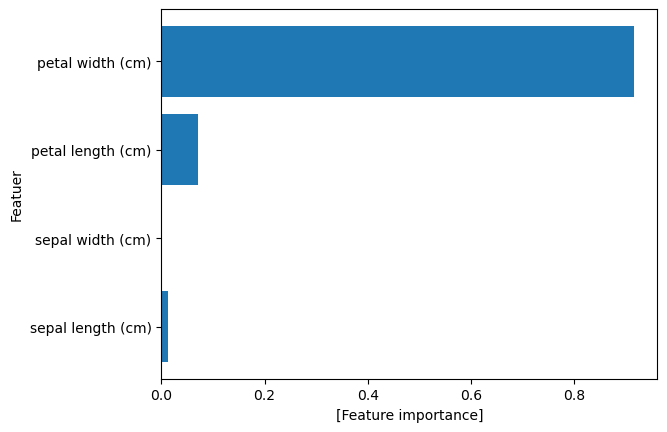

In [103]:
import matplotlib.pyplot as plt

plt.barh(range(best_model.n_features_in_),best_model.feature_importances_)
#           막대의 개수                        막대의 너비 값
plt.yticks(np.arange(best_model.n_features_in_),best_model.feature_names_in_)
plt.xlabel('[Feature importance]')
plt.ylabel('Featuer')
plt.show()

- DT 그래프 시각화
    * Graphviz 프로그램(OS에 맞는 버전) 설치 + python용 패키지 graphviz 설치

In [104]:
## (1) DT 모델을 dot포멧의 파일로 저장 =>> export_graphviz()
from sklearn.tree import export_graphviz

export_graphviz(best_model,out_file='tree.dot',
                class_names=['setosa','versicolor','verginica'],
                feature_names=best_model.feature_names_in_,
                impurity=True,filled=True)

In [105]:
best_model.classes_, targetSR.unique(), best_model.feature_names_in_

(array([0, 1, 2]),
 array([0, 1, 2]),
 array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'], dtype=object))

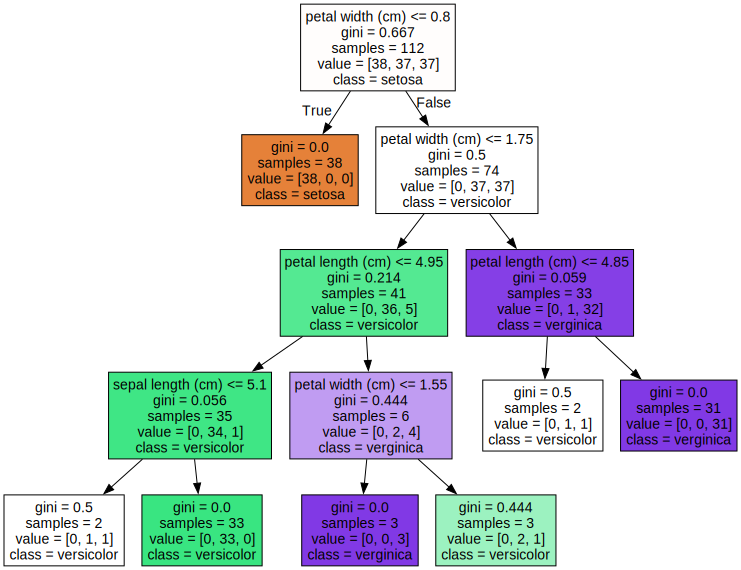

In [106]:
## (2) dot파일 출력
import graphviz

# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

[6] 새로운 데이터 예측

In [107]:
new_data = featureDF.iloc[:1]+0.21
new_data.shape

(1, 4)

In [108]:
best_model.predict(new_data)

array([0])

In [109]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])